In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
import math

In [ ]:
house_df = pd.read_excel('house_prices_data.xlsx') # Importing csv file into pandas data frame

In [ ]:
house_df_copy = copy.deepcopy(house_df)

In [ ]:
# Taking a look at the data
house_df.head()

,Year,Median,Average,# Sold,Interest,GDP ( Billions of US $),Per Capita (US $),GDP Growth (%),UNEMPLOYMENT RATE (DECEMBER),"INFLATION (DECEMBER, YOY)",Population
0,1971,25200,28300,656,7.541750,1164.850,5609.3826,3.2934,0.060,0.033,202907917
1,1972,27600,30500,718,7.383269,1279.110,6094.0180,5.2589,0.052,0.034,205238390
2,1973,32500,35500,634,8.044808,1425.376,6726.3590,5.6457,0.049,0.087,207314764
3,1974,35900,38900,519,9.187115,1545.243,7225.6914,-0.5406,0.072,0.123,209277968
4,1975,39300,42600,549,9.047115,1684.904,7801.4567,-0.2055,0.082,0.069,211274535


In [ ]:
# Checking to see the variables which are most correlated
house_df.corr()

,Year,Median,Average,# Sold,Interest,GDP ( Billions of US $),Per Capita (US $),GDP Growth (%),UNEMPLOYMENT RATE (DECEMBER),"INFLATION (DECEMBER, YOY)",Population
Year,1.000000,0.980340,0.982707,0.020483,-0.777205,0.984630,0.994425,-0.242404,-0.298264,-0.604754,0.998541
Median,0.980340,1.000000,0.998743,0.054260,-0.785561,0.993374,0.992834,-0.211206,-0.362725,-0.524671,0.978922
Average,0.982707,0.998743,1.000000,0.065334,-0.781174,0.991584,0.993438,-0.216093,-0.358015,-0.536621,0.981798
# Sold,0.020483,0.054260,0.065334,1.000000,-0.098418,-0.006199,0.017761,0.345883,-0.577033,-0.063021,0.025477
Interest,-0.777205,-0.785561,-0.781174,-0.098418,1.000000,-0.807386,-0.795079,0.116391,0.409921,0.521028,-0.795610
GDP ( Billions of US $),0.984630,0.993374,0.991584,-0.006199,-0.807386,1.000000,0.996906,-0.237267,-0.318313,-0.543805,0.986116
Per Capita (US $),0.994425,0.992834,0.993438,0.017761,-0.795079,0.996906,1.000000,-0.231419,-0.322976,-0.571143,0.994512
GDP Growth (%),-0.242404,-0.211206,-0.216093,0.345883,0.116391,-0.237267,-0.231419,1.000000,-0.456649,0.047510,-0.246654
UNEMPLOYMENT RATE (DECEMBER),-0.298264,-0.362725,-0.358015,-0.577033,0.409921,-0.318313,-0.322976,-0.456649,1.000000,0.128821,-0.299873
"INFLATION (DECEMBER, YOY)",-0.604754,-0.524671,-0.536621,-0.063021,0.521028,-0.543805,-0.571143,0.047510,0.128821,1.000000,-0.606166


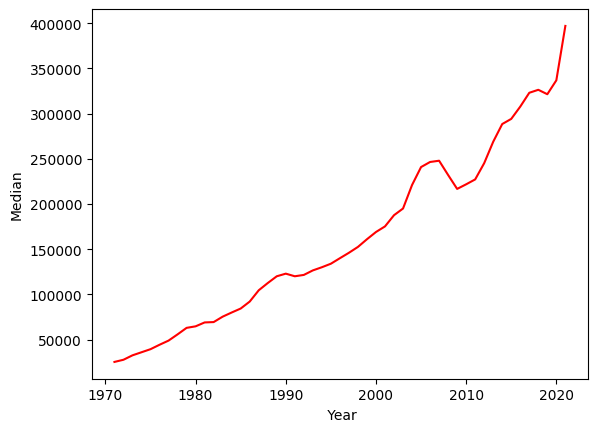

In [ ]:
plt.plot(house_df_copy[' Year'],house_df_copy['Median'], color='red')
plt.xlabel(' Year')
plt.ylabel('Median')
plt.show()

In [ ]:
house_df.columns.tolist() # The column names have some spaces. e.g ' Year'

[' Year',
 'Median',
 'Average',
 '# Sold',
 'Interest',
 ' GDP ( Billions of US $)',
 ' Per Capita (US $)',
 'GDP Growth (%)',
 'UNEMPLOYMENT RATE (DECEMBER)',
 'INFLATION (DECEMBER, YOY)',
 'Population']

In [ ]:
house_df.columns = [col.strip() for col in house_df.columns] # Removing spaces in column names
house_df_copy.columns = [col.strip() for col in house_df_copy.columns] # Removing spaces in column names

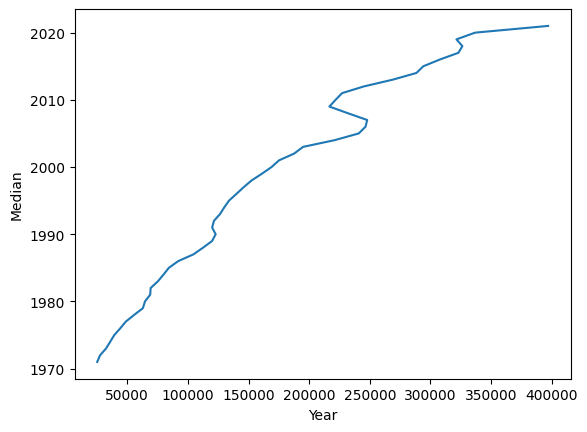

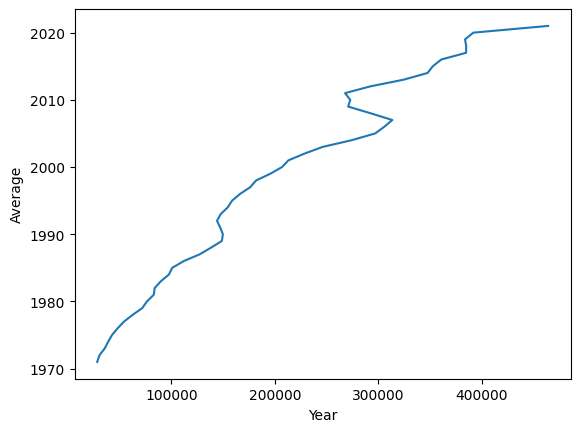

In [ ]:
# Average and Median seem very correlated, which statistically make sense.
# Let's plot that to check
for variable in ['Median','Average']:
  plt.plot(house_df[variable], house_df['Year'])
  plt.ylabel(variable)
  plt.xlabel("Year")
  plt.show()

In [ ]:
# Since the median and average are almost identical,
# we can drop the average column, because the median is a 
# better measure of the mid point of a distribution
house_df = house_df.drop('Average', axis = 1)

**Now let's check if other variables vary with each other using a pairplot.**

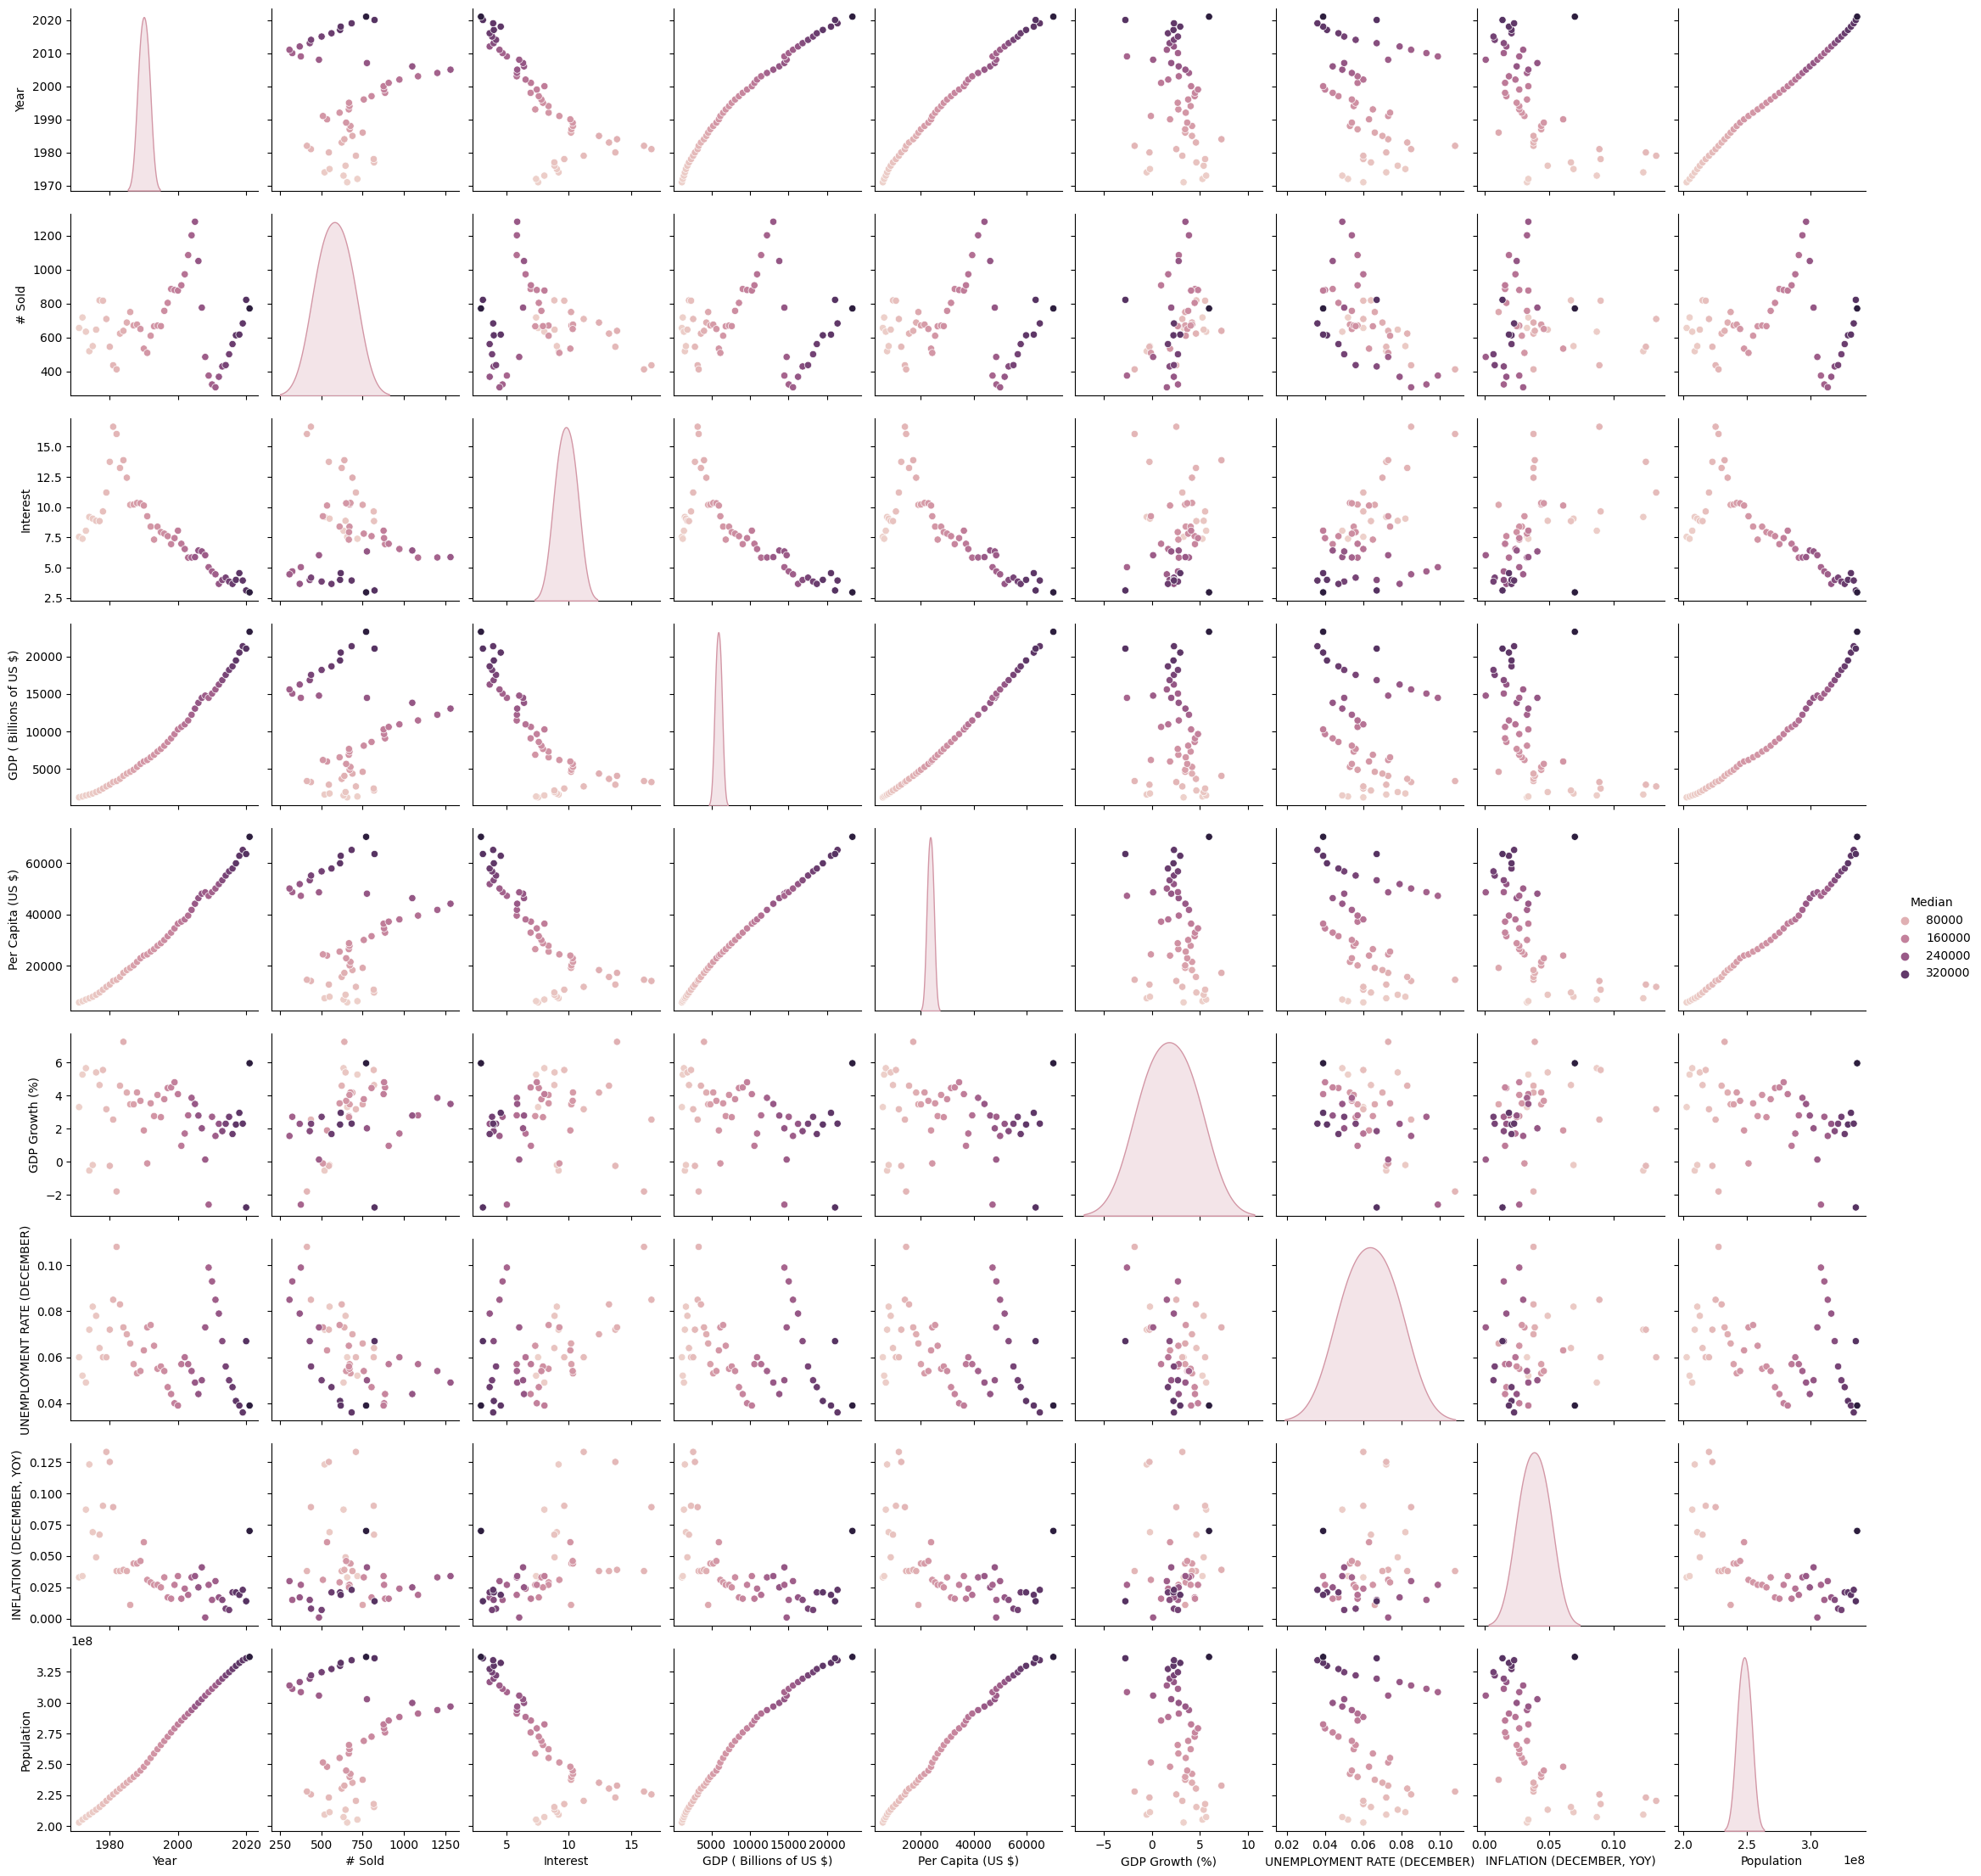

In [ ]:
sns.pairplot(house_df, hue="Median")

In [ ]:
median_correlations = house_df.corrwith(house_df['Median'])
corr_series = median_correlations.abs().nlargest(6)[1:]
print('Most influencing factors median price of houses in the US:')
top_variables = corr_series.index.tolist()
for index in corr_series.index:
  print(f'{index}: {round(median_correlations.loc[index],2)}')


Most influencing factors median price of houses in the US:
GDP ( Billions of US $): 0.99
Per Capita (US $): 0.99
Year: 0.98
Population: 0.98
Interest: -0.79


In [ ]:
# Split our data into training and testing datasets

xtrain, xtest, ytrain, ytrue = train_test_split(house_df.drop('Median', axis = 1), house_df["Median"], test_size = 0.1, random_state=37)

***Doing Linear Regression on each of the most correlated variable***

In [ ]:
lr_coefs = []
for variable in top_variables:
  lr_coefs.append(np.polyfit(xtrain.loc[:, variable], ytrain, 1))

In [ ]:
ranges = list(map(lambda column: house_df[column].max() - house_df[column].min(), top_variables)) # ranges of different variables
min_maxes = list(map(lambda column: (house_df[column].min(), house_df[column].max()), top_variables)) # (min, max) tuple of different variables

In [ ]:
potential_variable_values = [np.linspace(min_maxes[i][0] - 0.2 * ranges[i], min_maxes[i][1] + 0.2 * ranges[i],1000) for i in range(len(ranges))]
predicted_values = [lr_coefs[i][0] * potential_variable_values[i] + lr_coefs[i][1] for i in range(len(top_variables))]

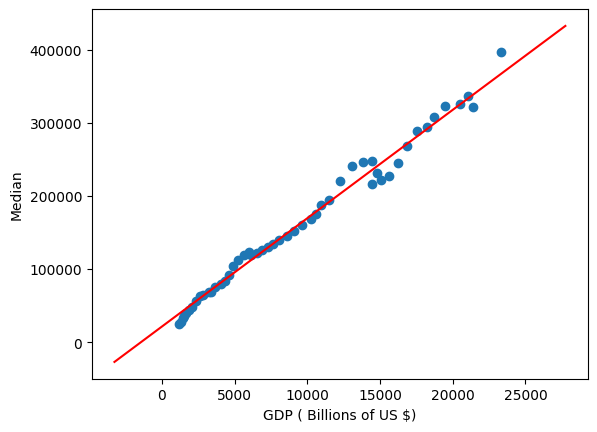

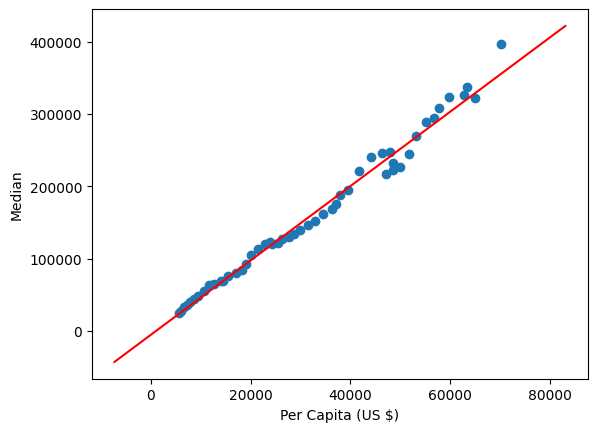

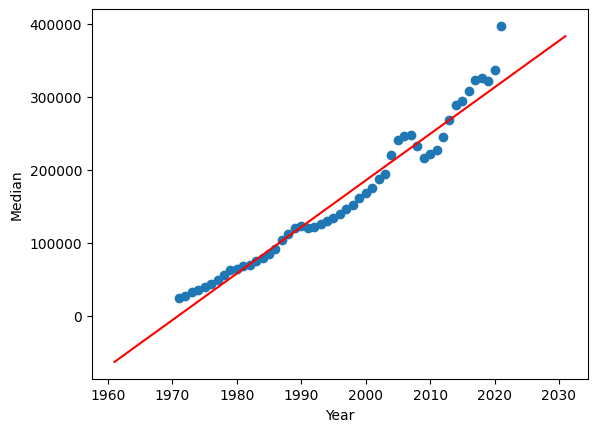

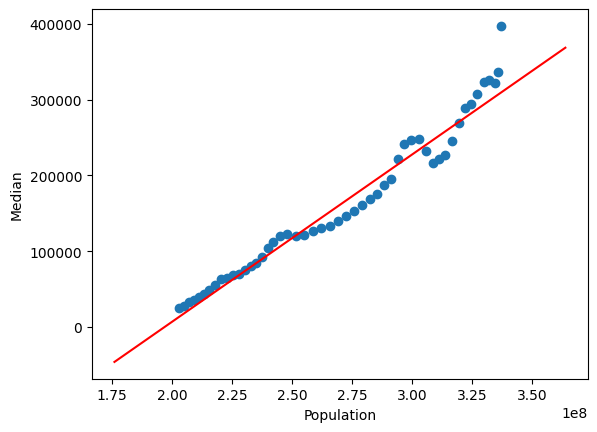

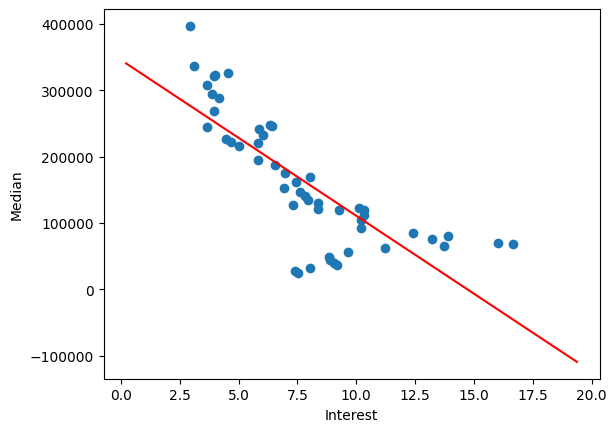

In [ ]:
# Plotting the data points along with the regression lines for each variable
for index, variable in enumerate(top_variables):
    plt.scatter(house_df_copy[variable],house_df_copy['Median'])
    plt.plot(potential_variable_values[index], predicted_values[index], color='red')
    plt.xlabel(variable)
    plt.ylabel('Median')
    plt.show()

***The fits above look good, especially for Per Capita. Now let's formally evaluate each regression using RMSE***

In [ ]:
# Test predictions
test_predictions = [lr_coefs[i][0] * xtest[top_variables[i]] + lr_coefs[i][1] for i in range(len(top_variables))]

In [ ]:
# Mean Squared Errors
MSE = [mean_squared_error(ytrue, test_predictions[i]) for i in range(len(top_variables))]


In [ ]:
for i, variable in enumerate(top_variables):
  print(variable, ": ", round(math.sqrt(MSE[i]),-3))


GDP ( Billions of US $) :  15000.0
Per Capita (US $) :  18000.0
Year :  34000.0
Population :  37000.0
Interest :  91000.0


***Note that, even though GDP, Per Capita,Population, and Year have an almost perfect correlation with Median House Price, their RMSE differ quite a lot, meaning that correlation is not necessarily the best way to determine whether a variable is realy good or not.***

**Given that RMSE may seem elusive, here are the test predictions followed by the true values**

In [ ]:
test_predictions

[18    105064.508674
 13     81274.099788
 9      63767.528674
 0      38664.615676
 5      49174.170861
 50    367201.949637
 Name: GDP ( Billions of US $), dtype: float64,
 18    111951.875193
 13     82505.208138
 9      59165.077774
 0      23406.601622
 5      38719.832973
 50    355246.553026
 Name: Per Capita (US $), dtype: float64,
 18    115579.013433
 13     83739.224304
 9      58267.393001
 0        955.772569
 5      32795.561698
 50    319353.663857
 Name: Year, dtype: float64,
 18    103267.809335
 13     19632.309113
 9      22818.983039
 0     168555.751921
 5     137433.405701
 50    276301.943476
 Name: Interest, dtype: float64]

In [ ]:
ytrue

18    120000
13     79900
9      64600
0      25200
5      44200
50    397100
Name: Median, dtype: int64

**Now let's do the regression with all the variable at once and see whether it improves our result.**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
test_predictions_multi = model.predict(xtest)

In [ ]:
# Root Mean Squared Error when using all variables
RMSE_multi = mean_squared_error(ytrue, test_predictions_multi)
print("RMSE with four variables combined: ", round(math.sqrt(RMSE_multi),-3))

RMSE with four variables combined:  6000.0


***Linear Regression using all the variables gaves us a result with about 14% improvement compared to the GDP alone. This means that just by using USA's GDP, someone can predict the median house price with a good accuracy and precision!***

In [ ]:
# create a Ridge regression object and fit the training data
ridge_reg = Ridge(alpha=0.37)
ridge_reg.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00072e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.37)

In [ ]:
# make predictions on the test data
ridge_pred = ridge_reg.predict(xtest)

In [ ]:
# evaluate the performance of the models
ridge_mse = mean_squared_error(ytrue, ridge_pred)
print('Root Mean square error when using Ridge regression: ', round(math.sqrt(ridge_mse), -3))

Root Mean square error when using Ridge regression:  5000.0


***L2 normalization improving the test accuracy. It minimizes overfitting, reason why it gives a better result.***